In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Courtesy of Alec

In [14]:
df = pd.read_csv("../datasets/Wastewater_Data_Full_UGS_Group5.csv")

In [3]:
df['Date'] = pd.to_datetime('07/06/2020')

In [4]:
df.dtypes

Date                                      datetime64[ns]
Zipcode                                            int64
Viral Load                                       float64
Positivity Rate                                    int64
Unvaccinated Rate                                  int64
Population                                        object
Educational attainment                            object
Educational attainment in TX                      object
Poverty                                           object
Poverty in Texas                                  object
Income (Median)                                   object
Income(Median in TX)                              object
Health(lack of health insurance)                  object
Health(lack of Health insurance in TX)            object
dtype: object

In [5]:

df['Positivity Rate'] = df['Positivity Rate'] / 100
df['Unvaccinated Rate'] = df['Unvaccinated Rate'] / 100
print(df.head())

        Date  Zipcode  Viral Load  Positivity Rate  Unvaccinated Rate  \
0 2020-07-06    77002        1.36             0.16               0.13   
1 2020-07-06    77003        1.12             0.06               0.18   
2 2020-07-06    77004        0.75             0.03               0.40   
3 2020-07-06    77005        0.50             0.29               0.13   
4 2020-07-06    77006         NaN             0.24               0.15   

  Population Educational attainment  Educational attainment in TX Poverty  \
0     19,844                  33.30%                       33.90%  17.90%   
1     11,874                  48.30%                       33.90%  21.30%   
2     37,005                  58.60%                       33.90%  27.30%   
3     28,241                  86.20%                       33.90%   4.30%   
4     24,129                  78.50%                       33.90%   8.80%   

  Poverty in Texas Income (Median) Income(Median in TX)  \
0              14%      $78,292.00     

In [9]:
import re
def clean_percentage_adjusted(value):
    if isinstance(value, str):
      
        cleaned_value = re.sub(r"\(\+-\s*\d*\.?\d*%\)", "", value).rstrip('%')
        return float(cleaned_value.replace(",", "").replace("%","").replace("$","")) / 100
    return value


for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(clean_percentage_adjusted)

print(df.head())

        Date  Zipcode  Viral Load  Positivity Rate  Unvaccinated Rate  \
0 2020-07-06    77002        1.36             0.16               0.13   
1 2020-07-06    77003        1.12             0.06               0.18   
2 2020-07-06    77004        0.75             0.03               0.40   
3 2020-07-06    77005        0.50             0.29               0.13   
4 2020-07-06    77006         NaN             0.24               0.15   

   Population  Educational attainment   Educational attainment in TX  Poverty  \
0      198.44                    0.333                         0.339    0.179   
1      118.74                    0.483                         0.339    0.213   
2      370.05                    0.586                         0.339    0.273   
3      282.41                    0.862                         0.339    0.043   
4      241.29                    0.785                         0.339    0.088   

   Poverty in Texas  Income (Median)  Income(Median in TX)  \
0           

In [10]:

def remove_commas_and_convert(value):
    if isinstance(value, str) and ',' in value:
        
        value_no_commas = value.replace(',', '')
        if '.' in value_no_commas:
            return float(value_no_commas)
        else:
            return int(value_no_commas)
    return value

for column in df.columns:
    df[column] = df[column].apply(remove_commas_and_convert)


In [11]:

import statsmodels.formula.api as smf

df_cleaned = df.dropna(subset=['Viral Load'])


formula = 'Q("Viral Load") ~ Q("Poverty") + Q("Population") + Q("Educational attainment ") + Q("Income (Median)") + Q("Health(lack of health insurance)")'


model = smf.ols(formula, data=df_cleaned).fit()
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:        Q("Viral Load")   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.528
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0342
Time:                        23:22:42   Log-Likelihood:                -644.84
No. Observations:                 100   AIC:                             1302.
Df Residuals:                      94   BIC:                             1317.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

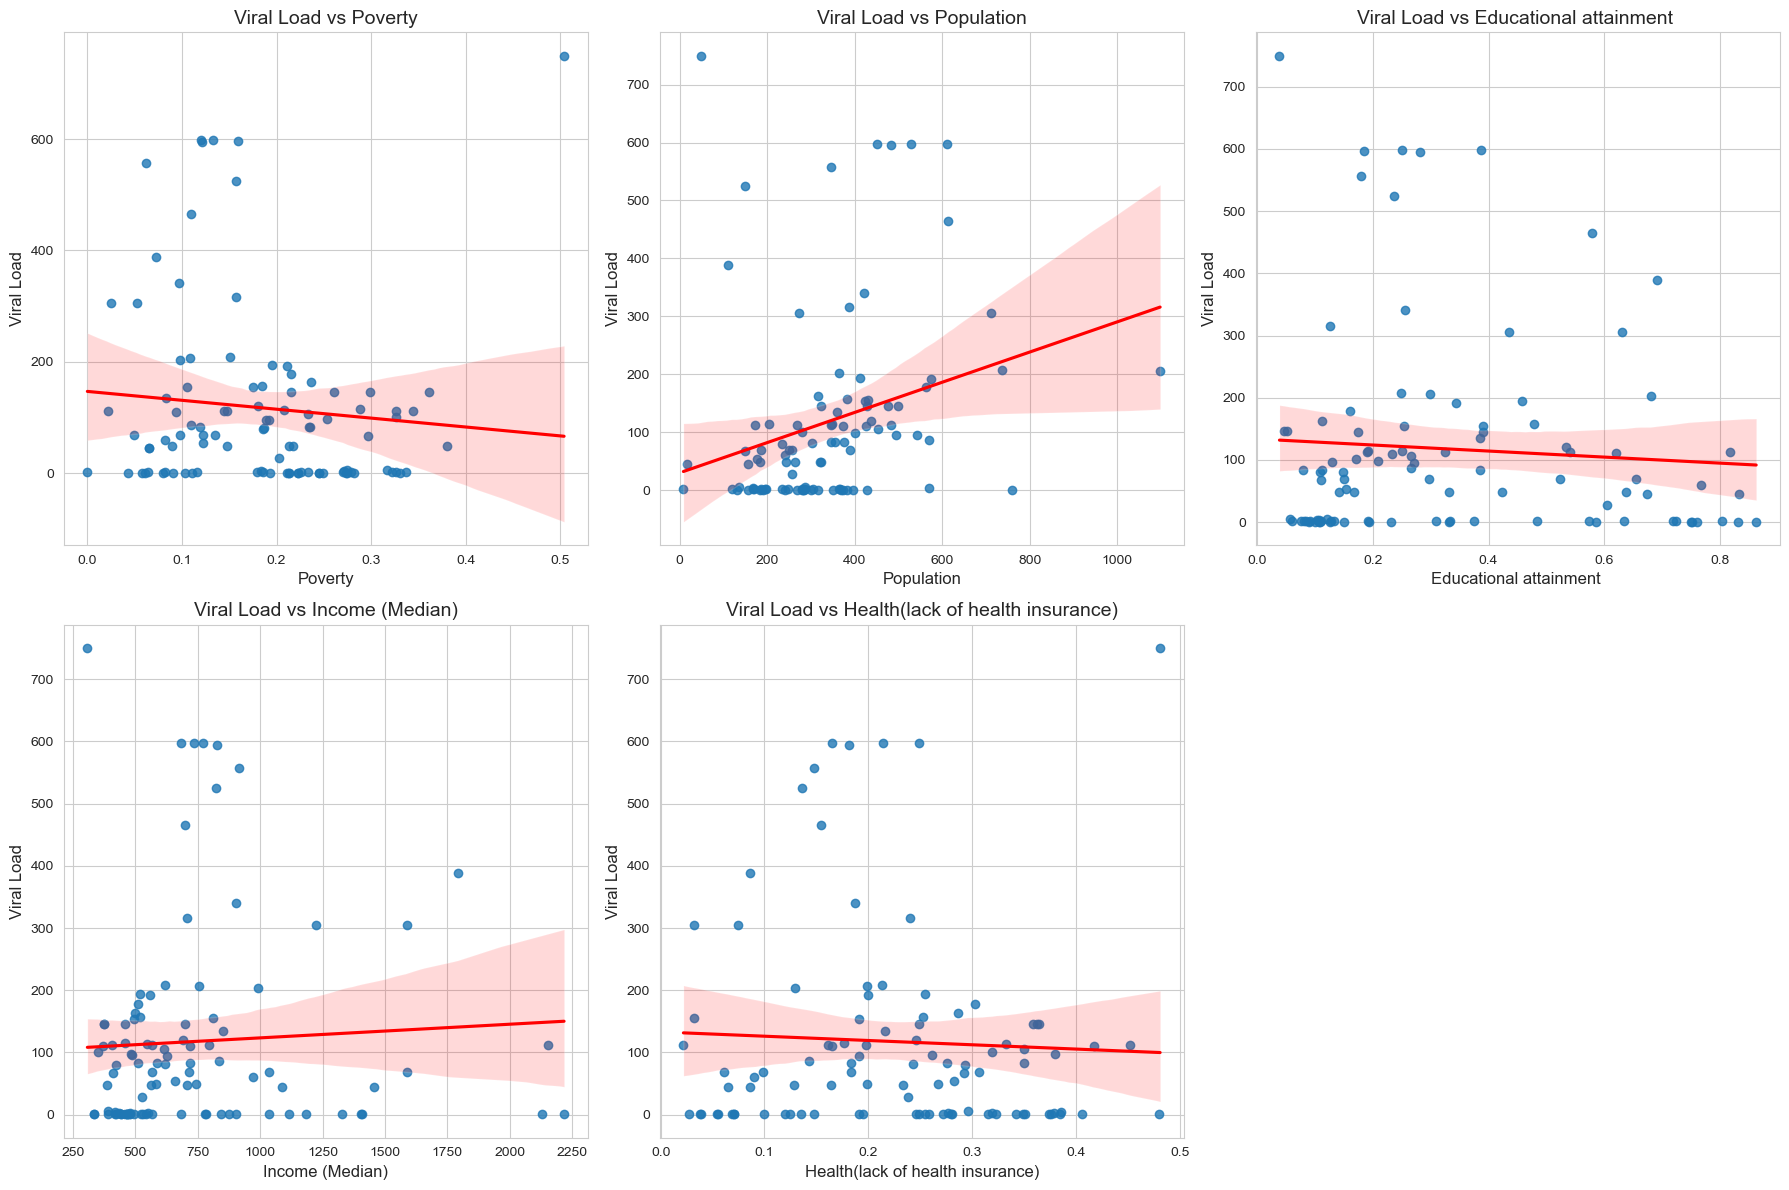

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
independent_vars = ['Poverty', 'Population', 'Educational attainment ', 'Income (Median)', 'Health(lack of health insurance)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten() 

for i, var in enumerate(independent_vars):
    sns.regplot(x=var, y='Viral Load', data=df_cleaned, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Viral Load vs {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Viral Load', fontsize=12)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
